<a href="https://colab.research.google.com/github/sujalshrstha/aiwroksheet/blob/main/SujalShresthaSoftMaxw6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
import numpy as np

def softmax(z):
    """
    Compute the softmax of a 2D numpy array along the specified axis.

    Parameters:
        z (numpy.ndarray): Input array of shape (m, n) where m is the number of samples
                           and n is the number of classes.

    Returns:
        numpy.ndarray: Softmax probabilities of the same shape as input (m, n), where
                       each row sums to 1 and represents the probability distribution
                       over classes for a sample.

    Notes:
        - Applies a normalization trick to prevent numerical instability by subtracting
          the max value in each row before exponentiation.
    """
    # Normalize input to prevent numerical instability
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [3]:
import numpy as np

def test_softmax():
    """
    Perform basic assertion tests on the softmax function to validate its correctness.

    Tests:
    - Ensure that the output probabilities sum to 1 for each row.
    - Ensure non-negative values (all probabilities should be >= 0).
    - Test on edge cases (e.g., all zeros, very large or small values).
    """
    # Test input
    test_cases = [
        (np.array([[0, 0, 0]]), "All zeros"),
        (np.array([[1, 2, 3]]), "Simple case"),
        (np.array([[1000, 1000, 1000]]), "Large identical values"),
        (np.array([[-1000, -1000, -1000]]), "Small identical values"),
        (np.array([[1, 0, -1]]), "Mixed positive and negative")
    ]

    for i, (z, description) in enumerate(test_cases):
        print(f"Test {i + 1}: {description}")
        result = softmax(z)

        # Check that probabilities sum to 1
        assert np.allclose(result.sum(axis=1), 1), f"Failed: Probabilities do not sum to 1 in {description}"

        # Check non-negativity
        assert np.all(result >= 0), f"Failed: Negative probabilities in {description}"

        print("Passed.")

    print("All tests passed for the softmax function.")
test_softmax()

Test 1: All zeros
Passed.
Test 2: Simple case
Passed.
Test 3: Large identical values
Passed.
Test 4: Small identical values
Passed.
Test 5: Mixed positive and negative
Passed.
All tests passed for the softmax function.


In [4]:
#Implementation of log-loss function
# Loss Function for a Single Observation
def loss_softmax(y_true, y_pred):
    """
    Compute the cross-entropy loss for a single observation.

    Parameters:
    y_true (numpy.ndarray): True labels (one-hot encoded) of shape (c,).
    y_pred (numpy.ndarray): Predicted probabilities of shape (c,).

    Returns:
    float: Cross-entropy loss for the observation.
    """
    # Add epsilon to prevent log(0) and compute the cross-entropy loss
    return -np.sum(y_true * np.log(y_pred + 1e-10))

In [5]:
import numpy as np

def test_loss_softmax():
    """
    Test the loss_softmax function using a known input and output.
    """
    # Test Case 1: Perfect prediction
    y_true = np.array([0, 1, 0])  # True label (one-hot encoded)
    y_pred = np.array([0.1, 0.8, 0.1])  # Predicted probabilities
    expected_loss = -np.log(0.8)  # Expected loss for perfect prediction
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 1 Failed"

    # Test Case 2: Incorrect prediction
    y_true = np.array([1, 0, 0])  # True label (one-hot encoded)
    y_pred = np.array([0.3, 0.4, 0.3])  # Predicted probabilities
    expected_loss = -np.log(0.3)  # Expected loss for incorrect prediction
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 2 Failed"

    # Test Case 3: Edge case with near-zero probability
    y_true = np.array([0, 1, 0])  # True label (one-hot encoded)
    y_pred = np.array([0.01, 0.98, 0.01])  # Predicted probabilities
    expected_loss = -np.log(0.98)  # Expected loss for edge case
    assert np.isclose(loss_softmax(y_true, y_pred), expected_loss), "Test Case 3 Failed"

    print("All test cases passed!")
# Run the test
test_loss_softmax()

All test cases passed!


In [6]:
import numpy as np

def cost_softmax(X, y, W, b):
    """
    Compute the average cross-entropy cost over all samples.

    Parameters:
        X (numpy.ndarray): Feature matrix of shape (n, d).
        y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
        W (numpy.ndarray): Weight matrix of shape (d, c).
        b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
        float: Average cross-entropy cost over all samples.
    """
    n, d = X.shape
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n


In [7]:
import numpy as np

def test_cost_softmax():
    """
    Test the cost_softmax function using a known input and output.
    """
    # Test Case 1: Small dataset with perfect predictions
    X = np.array([[1, 2], [2, 3], [3, 4]])  # Feature matrix (n=3, d=2)
    y = np.array([[1, 0], [0, 1], [1, 0]])  # True labels (n=3, c=2, one-hot encoded)
    W = np.array([[1, -1], [-1, 1]])  # Weight matrix (d=2, c=2)
    b = np.array([0, 0])  # Bias vector (c=2)
    z = np.dot(X, W) + b
    y_pred = softmax(z)  # Predicted probabilities
    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]  # Compute expected cost
    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 1 Failed"

    # Test Case 2: All-zero weights and bias
    X = np.array([[1, 0], [0, 1], [1, 1]])  # Feature matrix (n=3, d=2)
    y = np.array([[1, 0], [0, 1], [1, 0]])  # True labels (n=3, c=2, one-hot encoded)
    W = np.zeros((2, 2))  # Zero weight matrix
    b = np.zeros(2)  # Zero bias vector
    z = np.dot(X, W) + b
    y_pred = softmax(z)  # Predicted probabilities (uniform distribution)
    expected_cost = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]  # Compute expected cost
    assert np.isclose(cost_softmax(X, y, W, b), expected_cost), "Test Case 2 Failed"

    print("All test cases passed!")

# Run the test
test_cost_softmax()

All test cases passed!


In [8]:
import numpy as np

def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    tuple: Gradients with respect to weights (d, c) and biases (c,).
    """
    n, d = X.shape
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n

    return grad_W, grad_b

In [9]:
import numpy as np

# Softmax function definition (if not defined elsewhere)
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Test function
def test_compute_gradient_softmax():
    # Define simple inputs
    X = np.array([[1, 2], [3, 4]])  # Shape (2, 2)
    y = np.array([[1, 0], [0, 1]])  # Shape (2, 2), one-hot encoded
    W = np.array([[0.1, 0.2], [0.3, 0.4]])  # Shape (2, 2)
    b = np.array([0.01, 0.02])  # Shape (2,)

    # Expected gradients (calculated manually or using a reference implementation)
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    grad_W_expected = np.dot(X.T, (y_pred - y)) / X.shape[0]
    grad_b_expected = np.sum(y_pred - y, axis=0) / X.shape[0]

    # Compute gradients using the function
    grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

    # Assertions
    assert np.allclose(grad_W, grad_W_expected, atol=1e-6), "Gradient W does not match expected values"
    assert np.allclose(grad_b, grad_b_expected, atol=1e-6), "Gradient b does not match expected values"

    print("All tests passed for compute_gradient_softmax!")

# Run the test
test_compute_gradient_softmax()

All tests passed for compute_gradient_softmax!


In [10]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    alpha (float): Learning rate.
    n_iter (int): Number of iterations.
    show_cost (bool): Whether to display the cost at intervals.

    Returns:
    tuple: Optimized weights, biases, and cost history.
    """
    cost_history = []

    for i in range(n_iter):
        # Compute gradients
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

        # Update weights and biases
        W -= alpha * grad_W
        b -= alpha * grad_b

        # Calculate and store the cost
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        # Print cost at specified intervals
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return W, b, cost_history

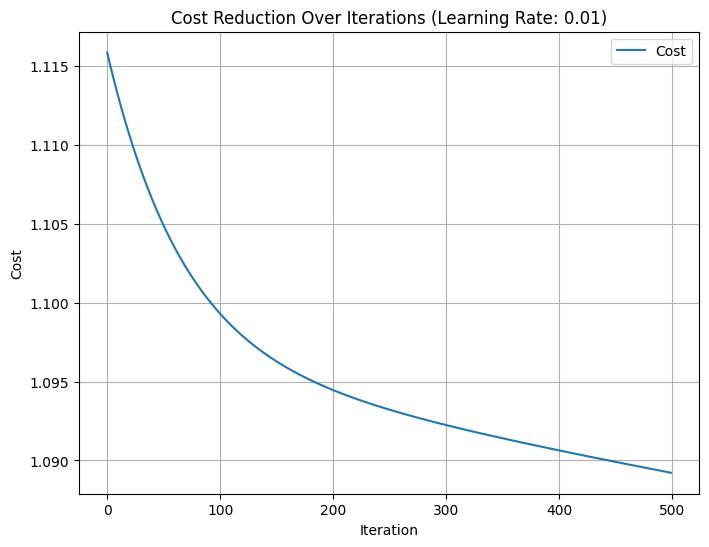

Initial Cost: 1.1158608479596404
Final Cost: 1.0892233754862581


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def test_gradient_descent_softmax_with_plot():
    # Generate synthetic data for testing
    np.random.seed(0)
    n, d, c = 100, 5, 3  # 100 samples, 5 features, 3 classes
    X = np.random.rand(n, d)

    # Generate random labels and one-hot encode them
    y_indices = np.random.randint(0, c, size=n)
    y = np.zeros((n, c))
    y[np.arange(n), y_indices] = 1  # One-hot encoding

    # Initialize weights and biases
    W = np.random.rand(d, c)
    b = np.random.rand(c)

    # Parameters for gradient descent
    alpha = 0.01  # Learning rate
    n_iter = 500  # Number of iterations

    # Run gradient descent
    W_opt, b_opt, cost_history = gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False)

    # Plot the cost history
    plt.figure(figsize=(8, 6))
    plt.plot(range(n_iter), cost_history, label="Cost")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title(f"Cost Reduction Over Iterations (Learning Rate: {alpha})")
    plt.legend()
    plt.grid()
    plt.show()

    # Final cost should ideally be less than initial cost
    print(f"Initial Cost: {cost_history[0]}")
    print(f"Final Cost: {cost_history[-1]}")

# Run the test
test_gradient_descent_softmax_with_plot()

In [12]:
import numpy as np

# Prediction Function
def predict_softmax(X, W, b):
    """
    Predict the class labels for input data.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    numpy.ndarray: Predicted class labels of shape (n,).
    """
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)


In [13]:
def test_predict_softmax():
    # Generate synthetic data for testing
    np.random.seed(0)
    n, d, c = 10, 5, 3  # 10 samples, 5 features, 3 classes
    X = np.random.rand(n, d)
    W = np.random.rand(d, c)
    b = np.random.rand(c)

    # Compute the predictions using the function
    predictions = predict_softmax(X, W, b)

    # Check the shape of the output
    assert predictions.shape == (n,), f"Shape mismatch: expected {(n,)}, got {predictions.shape}"

    # Verify that all predicted labels are within the range of class indices
    assert np.all(predictions >= 0) and np.all(predictions < c), (
        f"Predictions out of range: expected 0 to {c-1}, got {predictions}"
    )

    # Check that the predicted labels are integers
    assert np.issubdtype(predictions.dtype, np.integer), f"Predictions are not integers: {predictions.dtype}"

    print("All tests passed for predict_softmax!")

# Run the test
test_predict_softmax()

All tests passed for predict_softmax!


In [14]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_classification(y_true, y_pred):
    """
    Evaluate the classification performance using confusion matrix, precision, recall, and F1-score.

    Parameters:
    y_true (numpy.ndarray): True class labels of shape (n,).
    y_pred (numpy.ndarray): Predicted class labels of shape (n,).

    Returns:
    tuple: Confusion matrix, precision, recall, and F1-score.
    """
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Precision (weighted average)
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0)

    # Recall (weighted average)
    recall = recall_score(y_true, y_pred, average="weighted", zero_division=0)

    # F1-score (weighted average)
    f1 = f1_score(y_true, y_pred, average="weighted", zero_division=0)

    return cm, precision, recall, f1

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

# Display information about the dataset before cleaning
print("Dataset Info:")
X.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [16]:
print("\nDataset Description Before Cleaning:")
X.describe()


Dataset Description Before Cleaning:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Creates a Feature Matrix
y = iris.target  # Creates a Target Vector

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Reshape y to be a 2D array (required for OneHotEncoder)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Display the one-hot encoded target matrix
print(y_onehot)


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Target vector

# One-hot encoding for target labels
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)

# Initialize the scaler and scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Assertions to check the shape of X_train_scaled and X_test_scaled
assert X_train_scaled.shape == (X_train.shape[0], X_train.shape[1]), f"X_train_scaled shape mismatch: {X_train_scaled.shape}"
assert X_test_scaled.shape == (X_test.shape[0], X_test.shape[1]), f"X_test_scaled shape mismatch: {X_test_scaled.shape}"

print("Shape assertions passed!")

Shape assertions passed!



Training Softmax Regression Model:
Iteration 0: Cost = 1.006823
Iteration 100: Cost = 0.319428
Iteration 200: Cost = 0.251376
Iteration 300: Cost = 0.211741
Iteration 400: Cost = 0.185004
Iteration 500: Cost = 0.165744
Iteration 600: Cost = 0.151226
Iteration 700: Cost = 0.139898
Iteration 800: Cost = 0.130812
Iteration 900: Cost = 0.123360
Iteration 999: Cost = 0.117192


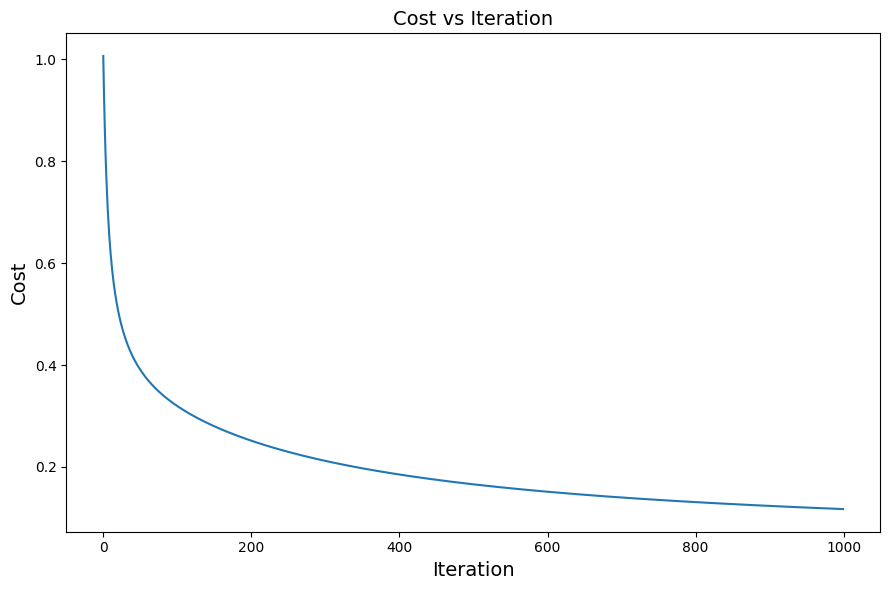

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Intitalizations:
num_classes = y_train.shape[1]  # Number of output classes
num_features = X_train_scaled.shape[1]  # Number of input features
W = np.zeros((num_features, num_classes))  # Initialize weights
b = np.zeros(num_classes)  # Initialize biases
alpha = 0.1  # Learning rate
n_iter = 1000  # Number of iterations

print("\nTraining Softmax Regression Model:")

# Run gradient descent to optimize the weights and biases
W, b, cost_history = gradient_descent_softmax(X_train_scaled, y_train, W, b, alpha, n_iter, show_cost=True)

# Plot Cost vs. Iterations:
plt.figure(figsize=(9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()  # Display the plot

In [20]:
# Test model
y_train_pred = predict_softmax(X_train_scaled, W, b)
y_test_pred = predict_softmax(X_test_scaled, W, b)

# Evaluate train and test performance
train_cost = cost_softmax(X_train_scaled, y_train, W, b)
test_cost = cost_softmax(X_test_scaled, y_test, W, b)
print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


Train Loss (Cost): 0.1172
Test Loss (Cost): 0.1575


In [21]:
# Accuracy on test data
# test_accuracy = np.mean(y_test_pred == y_test) * 100
test_accuracy = np.mean(y_test_pred == np.argmax(y_test, axis=1)) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")
# Evaluation
y_test_true = np.argmax(y_test, axis=1)
cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)

print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Test Accuracy: 93.33%

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Precision: 0.93
Recall: 0.93
F1-Score: 0.93


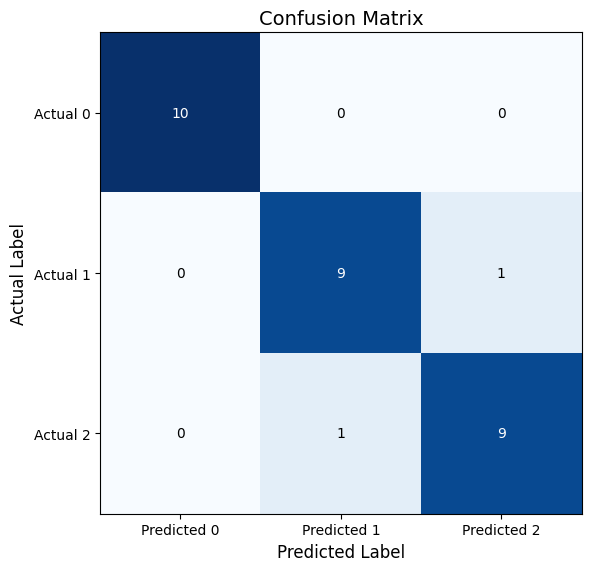

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Visualization
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm, cmap='Blues')  # Use a color map for better visualization

# Set tick labels for the axes
ax.set_xticks(range(3))
ax.set_yticks(range(3))
ax.set_xticklabels(['Predicted 0', 'Predicted 1', 'Predicted 2'])
ax.set_yticklabels(['Actual 0', 'Actual 1', 'Actual 2'])

# Add labels to each cell in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center',
                color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

# Add grid lines and axis labels
ax.grid(False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.show()